In [27]:
%matplotlib inline

In [28]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

import statsmodels.api as sm


In [29]:
# Import our data into pandas from CSV
#BCH data make new df with only close and date columns and rename close column to BCH
bch_raw = 'Cryptos - YF/BCH-USD.csv'
bch_df = pd.read_csv(bch_raw, low_memory=False)
bch = bch_df[["Date", "Close"]]
clean_bch= bch.rename(columns={"Close": "BCH_Close"})
clean_bch["BCH_PC"] = clean_bch["BCH_Close"].pct_change()

#BNB follow same process as above
bnb_raw = 'Cryptos - YF/BNB-USD.csv'
bnb_df = pd.read_csv(bnb_raw, low_memory=False)
bnb = bnb_df[["Date", "Close"]]
clean_bnb= bnb.rename(columns={"Close": "BNB_Close"})
clean_bnb["BNB_PC"] = clean_bnb["BNB_Close"].pct_change()

#BTC follow same process as above
btc_raw = 'Cryptos - YF/BTC-USD.csv'
btc_df = pd.read_csv(btc_raw, low_memory=False)
btc = btc_df[["Date", "Close"]]
clean_btc= btc.rename(columns={"Close": "BTC_Close"})
clean_btc["BTC_PC"] = clean_btc["BTC_Close"].pct_change()

#EOS follow same process as above
eos_raw = 'Cryptos - YF/EOS-USD.csv'
eos_df = pd.read_csv(eos_raw, low_memory=False)
eos = eos_df[["Date", "Close"]]
clean_eos= eos.rename(columns={"Close": "EOS_Close"})
clean_eos["EOS_PC"] = clean_eos["EOS_Close"].pct_change()

#ETH follow same process as above
eth_raw = 'Cryptos - YF/ETH-USD.csv'
eth_df = pd.read_csv(eth_raw, low_memory=False)
eth = eth_df[["Date", "Close"]]
clean_eth= eth.rename(columns={"Close": "ETH_Close"})
clean_eth["ETH_PC"] = clean_eth["ETH_Close"].pct_change()

#LINK follow same process as above
link_raw = 'Cryptos - YF/LINK-USD.csv'
link_df = pd.read_csv(link_raw, low_memory=False)
link = link_df[["Date", "Close"]]
clean_link= link.rename(columns={"Close": "LINK_Close"})
clean_link["LINK_PC"] = clean_link["LINK_Close"].pct_change()

#LTC follow same process as above
ltc_raw = 'Cryptos - YF/LTC-USD.csv'
ltc_df = pd.read_csv(ltc_raw, low_memory=False)
ltc = ltc_df[["Date", "Close"]]
clean_ltc= ltc.rename(columns={"Close": "LTC_Close"})
clean_ltc["LTC_PC"] = clean_ltc["LTC_Close"].pct_change()

#TRX follow same process as above
trx_raw = 'Cryptos - YF/TRX-USD.csv'
trx_df = pd.read_csv(trx_raw, low_memory=False)
trx = trx_df[["Date", "Close"]]
clean_trx= trx.rename(columns={"Close": "TRX_Close"})
clean_trx["TRX_PC"] = clean_trx["TRX_Close"].pct_change()

#XLM follow same process as above
xlm_raw = 'Cryptos - YF/XLM-USD.csv'
xlm_df = pd.read_csv(xlm_raw, low_memory=False)
xlm = xlm_df[["Date", "Close"]]
clean_xlm= xlm.rename(columns={"Close": "XLM_Close"})
clean_xlm["XLM_PC"] = clean_xlm["XLM_Close"].pct_change()

#XRP follow same process as above
xrp_raw = 'Cryptos - YF/XRP-USD.csv'
xrp_df = pd.read_csv(xrp_raw, low_memory=False)
xrp = xrp_df[["Date", "Close"]]
clean_xrp= xrp.rename(columns={"Close": "XRP_Close"})
clean_xrp["XRP_PC"] = clean_xrp["XRP_Close"].pct_change()

#merge all clean df's into one big df
BCH_BNB= pd.merge(clean_bch, clean_bnb, how ="inner", on= "Date")
BTC_EOS= pd.merge(clean_btc, clean_eos, how ="inner", on= "Date")
ETH_LINK= pd.merge(clean_eth, clean_link, how ="inner", on= "Date")
LTC_TRX= pd.merge(clean_ltc, clean_trx, how ="inner", on= "Date")
XLM_XRP= pd.merge(clean_xlm, clean_xrp, how ="inner", on= "Date")

BCH_EOS= pd.merge(BCH_BNB, BTC_EOS, how ="inner", on= "Date")
ETH_TRX=pd.merge(ETH_LINK, LTC_TRX, how ="inner", on= "Date")
BCH_TRX=pd.merge(BCH_EOS, ETH_TRX, how="inner", on= "Date")

Yahoo_Combined= pd.merge(BCH_TRX, XLM_XRP, how="inner", on="Date")

Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
0,2017-09-21,416.130005,-0.128067,0.7018,-0.096084,3617.270020,-0.068233,0.5671,-0.080279,257.769989,...,0.1727,NaN,46.459999,-0.098914,0.002075,-0.237693,0.01057,-0.140650,0.1710,-0.058888
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655


In [30]:
Yahoo_Combined = Yahoo_Combined.drop([0], axis=0)
Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655
5,2017-09-26,449.559998,-0.002861,0.8642,-0.066940,3892.699951,-0.010204,0.5614,-0.013010,288.640015,...,0.1951,0.093610,52.270000,0.000000,0.001876,0.078161,0.01236,0.026578,0.1892,0.024919


In [31]:
Yahoo_Combined.replace([np.inf,-np.inf], np.nan,inplace=True)
Yahoo_Combined=Yahoo_Combined.fillna(0)

Yahoo_Combined.head()

,Date,BCH_Close,BCH_PC,BNB_Close,BNB_PC,BTC_Close,BTC_PC,EOS_Close,EOS_PC,ETH_Close,...,LINK_Close,LINK_PC,LTC_Close,LTC_PC,TRX_Close,TRX_PC,XLM_Close,XLM_PC,XRP_Close,XRP_PC
1,2017-09-22,409.630005,-0.015620,0.7158,0.019949,3600.830078,-0.004545,0.5659,-0.002116,262.940002,...,0.1578,-0.086277,47.669998,0.026044,0.002077,0.000964,0.01077,0.018921,0.1728,0.010526
2,2017-09-23,430.309998,0.050485,0.7716,0.077955,3788.020020,0.051985,0.5780,0.021382,286.140015,...,0.1335,-0.153992,49.290001,0.033984,0.002346,0.129514,0.01190,0.104921,0.1791,0.036458
3,2017-09-24,421.190002,-0.021194,0.7848,0.017107,3667.520020,-0.031811,0.5454,-0.056401,282.600006,...,0.1696,0.270412,47.500000,-0.036316,0.002247,-0.042199,0.01157,-0.027731,0.1757,-0.018984
4,2017-09-25,450.850006,0.070420,0.9262,0.180173,3932.830078,0.072340,0.5688,0.042904,294.890015,...,0.1784,0.051887,52.270000,0.100421,0.001740,-0.225634,0.01204,0.040622,0.1846,0.050655
5,2017-09-26,449.559998,-0.002861,0.8642,-0.066940,3892.699951,-0.010204,0.5614,-0.013010,288.640015,...,0.1951,0.093610,52.270000,0.000000,0.001876,0.078161,0.01236,0.026578,0.1892,0.024919


In [32]:
group1 = Yahoo_Combined["BTC_PC"]
group2 = Yahoo_Combined["BNB_PC"]
group3 = Yahoo_Combined["BCH_PC"]
group4 = Yahoo_Combined["EOS_PC"]
group5 = Yahoo_Combined["ETH_PC"]
group6 = Yahoo_Combined["LINK_PC"]
group7 = Yahoo_Combined["LTC_PC"]
group8 = Yahoo_Combined["TRX_PC"]
group9 = Yahoo_Combined["XLM_PC"]
group10 = Yahoo_Combined["XRP_PC"]

gp_ls = [group2, group3, group4, group5, group6, group7, group8, group9, group10]
ls = ["BTC","BNB", "BCH", "EOS", "ETH", "LINK", "LTC", "TRX", "XLM", "XRP"]

r2 = []

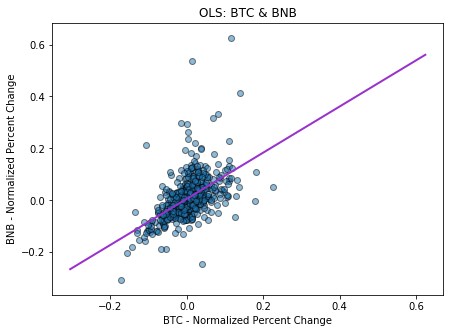

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BNB_PC   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     261.4
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           7.50e-50
Time:                        15:09:12   Log-Likelihood:                 889.09
No. Observations:                 669   AIC:                            -1774.
Df Residuals:                     667   BIC:                            -1765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.002      2.411      0.016       0.001       0.011
BTC_PC         0.8882      0.055     16.167      0.000       0.780       0.996
==============================================================================
Omnibus:                      417.378   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7738.616
Skew:                           2.437   Prob(JB):                         0.00
Kurtosis:                      18.933   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
i = 0

x_axis = group1
y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]
BTC = sm.add_constant(group1)

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")


x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

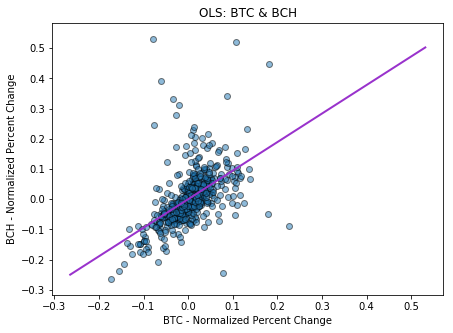

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BCH_PC   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     258.9
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.85e-49
Time:                        15:09:13   Log-Likelihood:                 844.35
No. Observations:                 669   AIC:                            -1685.
Df Residuals:                     667   BIC:                            -1676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.003      0.077      0.938      -0.005       0.005
BTC_PC         0.9451      0.059     16.089      0.000       0.830       1.060
==============================================================================
Omnibus:                      445.619   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9851.541
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      21.059   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
i += 1

y_axis = gp_ls[i]


plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")

x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

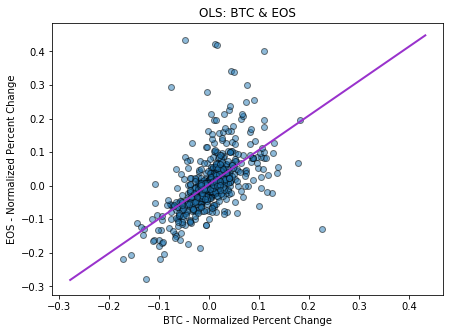

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EOS_PC   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     326.0
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.23e-59
Time:                        15:09:13   Log-Likelihood:                 866.46
No. Observations:                 669   AIC:                            -1729.
Df Residuals:                     667   BIC:                            -1720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.003      1.412      0.158      -0.001       0.009
BTC_PC         1.0262      0.057     18.056      0.000       0.915       1.138
==============================================================================
Omnibus:                      344.591   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4517.883
Skew:                           1.977   Prob(JB):                         0.00
Kurtosis:                      15.101   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")


x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

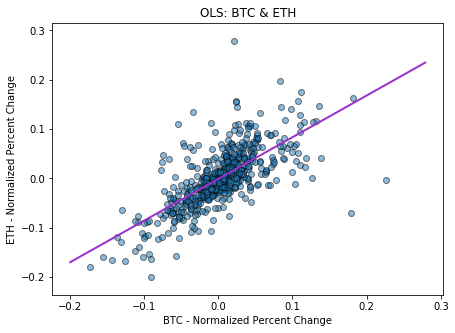

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ETH_PC   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     641.4
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.13e-99
Time:                        15:09:13   Log-Likelihood:                 1222.7
No. Observations:                 669   AIC:                            -2441.
Df Residuals:                     667   BIC:                            -2432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.002     -0.588      0.557      -0.004       0.002
BTC_PC         0.8452      0.033     25.327      0.000       0.780       0.911
==============================================================================
Omnibus:                      133.093   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1256.455
Skew:                           0.582   Prob(JB):                    1.46e-273
Kurtosis:                       9.612   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")

x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

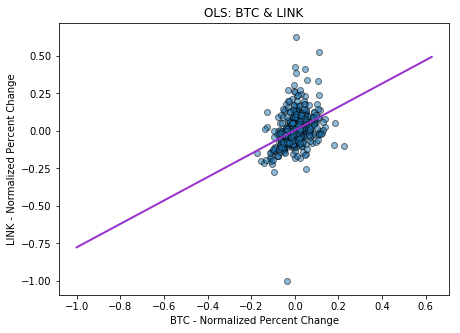

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LINK_PC   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     93.47
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           8.82e-21
Time:                        15:09:14   Log-Likelihood:                 631.07
No. Observations:                 669   AIC:                            -1258.
Df Residuals:                     667   BIC:                            -1249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.004      1.155      0.249      -0.003       0.011
BTC_PC         0.7811      0.081      9.668      0.000       0.622       0.940
==============================================================================
Omnibus:                      207.709   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12487.299
Skew:                          -0.472   Prob(JB):                         0.00
Kurtosis:                      24.144   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")


x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

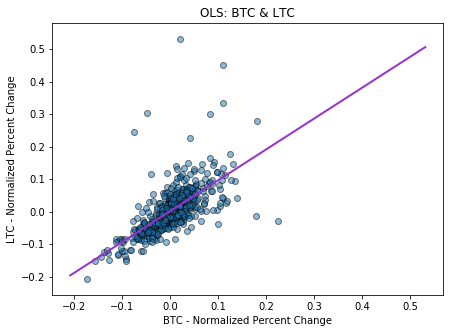

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LTC_PC   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     518.9
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           2.10e-85
Time:                        15:09:14   Log-Likelihood:                 1072.3
No. Observations:                 669   AIC:                            -2141.
Df Residuals:                     667   BIC:                            -2132.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.002      0.332      0.740      -0.003       0.004
BTC_PC         0.9517      0.042     22.779      0.000       0.870       1.034
==============================================================================
Omnibus:                      561.717   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25474.271
Skew:                           3.405   Prob(JB):                         0.00
Kurtosis:                      32.453   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")



x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

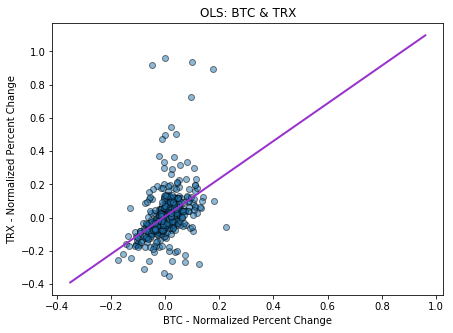

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TRX_PC   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     140.3
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.65e-29
Time:                        15:09:15   Log-Likelihood:                 517.12
No. Observations:                 669   AIC:                            -1030.
Df Residuals:                     667   BIC:                            -1021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.004      1.639      0.102      -0.001       0.016
BTC_PC         1.1348      0.096     11.845      0.000       0.947       1.323
==============================================================================
Omnibus:                      551.708   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19144.327
Skew:                           3.416   Prob(JB):                         0.00
Kurtosis:                      28.300   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")


x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

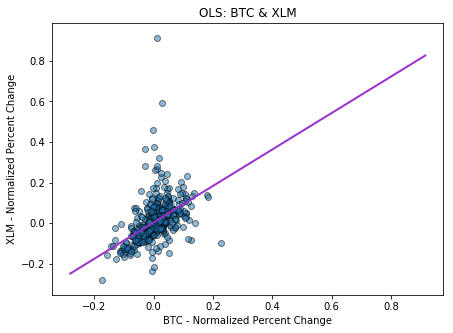

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 XLM_PC   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     187.4
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           9.00e-38
Time:                        15:09:15   Log-Likelihood:                 769.79
No. Observations:                 669   AIC:                            -1536.
Df Residuals:                     667   BIC:                            -1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.003      1.417      0.157      -0.002       0.010
BTC_PC         0.8989      0.066     13.689      0.000       0.770       1.028
==============================================================================
Omnibus:                      628.671   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39020.307
Skew:                           3.968   Prob(JB):                         0.00
Kurtosis:                      39.563   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")


x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

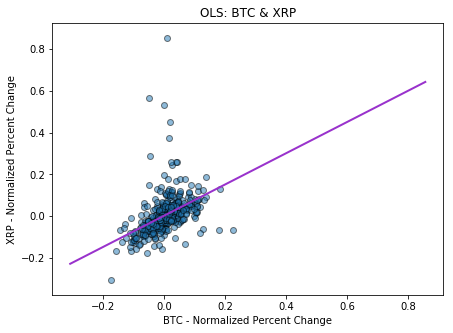

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 XRP_PC   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     157.9
Date:                Tue, 30 Jul 2019   Prob (F-statistic):           1.16e-32
Time:                        15:09:15   Log-Likelihood:                 833.90
No. Observations:                 669   AIC:                            -1664.
Df Residuals:                     667   BIC:                            -1655.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.003      0.608      0.544      -0.004       0.007
BTC_PC         0.7499      0.060     12.568      0.000       0.633       0.867
==============================================================================
Omnibus:                      747.332   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70284.423
Skew:                           5.171   Prob(JB):                         0.00
Kurtosis:                      52.137   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
i += 1

y_axis = gp_ls[i]

plt.figure(figsize=(7,5))
plt.scatter(x_axis, y_axis, alpha = .5, edgecolor = "black")
plt.title(f"OLS: BTC & {ls[i+1]}")

x = gp_ls[i]

model = sm.OLS(x, BTC)
OLS_result= model.fit()
output = OLS_result.summary()

plt.xlabel("BTC - Normalized Percent Change")
plt.ylabel(f"{ls[i+1]} - Normalized Percent Change")


x_pred = np.linspace(x.min(), x.max())
x_pred2 = sm.add_constant(x_pred)
y_pred = OLS_result.predict(x_pred2)
plt.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)


plt.savefig(f"Images/OLS_BTC_{ls[i+1]}.png")


plt.show()

r2.append(OLS_result.rsquared)

output

In [45]:
ls = ls
ls2 = ls.copy()

try:
    ls2.remove("BTC")
except:
    pass

r2_df = pd.DataFrame({}, index=["R-Squared"])

i = 0

for x in ls2:
    x2 = []
    x2.append(r2[i])
    r2_df[ls2[i]] = x2
    i += 1

r2_df

,BNB,BCH,EOS,ETH,LINK,LTC,TRX,XLM,XRP
R-Squared,0.281533,0.279598,0.328313,0.490234,0.12291,0.437543,0.173789,0.219333,0.191465


In [46]:
r2b = r2.copy()
max_ls = []
top = 3 
# r2b_df = pd.DataFrame

for x in range(top):
    index = r2b.index(max(r2b))
    max_ls.append(ls2[index])
    r2b[index] = 0
    
r2b_df = r2_df[[x for x in max_ls]]

r2b_df
    

,ETH,LTC,EOS
R-Squared,0.490234,0.437543,0.328313


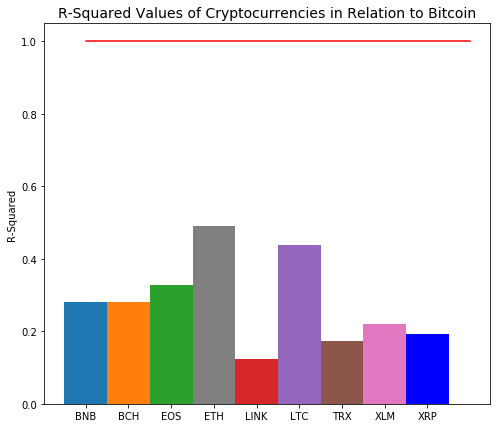

In [44]:
x_axis = 1

plt.figure(figsize=(8,7))

for x in r2_df.columns:
    y_axis = r2_df[x]

    if x == "ETH":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "grey")
    elif x == "XRP":
        plt.bar(x_axis, y_axis, align = "center", width = 1, color = "blue")
    else:
        plt.bar(x_axis, y_axis, align = "center", width = 1,)
    x_axis += 1 
    
plt.plot([1, x_axis],[1,1], color = "red")
    
    
plt.xticks(np.arange(start = 1, stop = x_axis, step = 1), ls2)
plt.ylabel("R-Squared")
plt.title("R-Squared Values of Cryptocurrencies in Relation to Bitcoin", size = 14)

plt.savefig("Images/RSquaredBar.png")

plt.show()